In [1]:
import os
import re
import sys
from collections import Counter

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

sys.path.append(os.path.realpath(".."))

from evlp_bronch.util import get_project_root_dir

## CSV Files

In [2]:
LABELED_DATA_DIR = get_project_root_dir() / "data/labelled_data"
CSV_FILES = sorted(LABELED_DATA_DIR.glob("*.csv"))
[csv_file.name for csv_file in CSV_FILES]

['20190902_EVLP579_labeled.csv',
 '20191012_EVLP595_labeled.csv',
 '20191101_EVLP598_labeled.csv',
 '20191108_EVLP600_labeled.csv',
 '20191115_EVLP603_labeled.csv',
 '20191116_EVLP606_labeled.csv',
 '20191120_EVLP607_labeled.csv',
 '20191125_EVLP610_labeled.csv',
 '20191205_EVLP615_labeled.csv',
 '20191205_EVLP616_labeled.csv',
 '20191210_EVLP617_labeled.csv',
 '20191211_EVLP618_labeled.csv',
 '20191212_EVLP619_labeled.csv',
 '20201019_EVLP682_labeled.csv',
 '20201204_EVLP698_labeled.csv',
 '20210318_EVLP731_labeled.csv',
 '20210403_EVLP735_labeled.csv',
 '20210410_EVLP738_labeled.csv',
 '20210521_EVLP753_labeled.csv',
 '20210620_EVLP762_labeled.csv',
 '20210925_EVLP782_labeled.csv',
 '20220218_EVLP803_labeled.csv',
 '20220417_EVLP817_labeled.csv',
 '20220418_EVLP818_labeled.csv',
 'EVLP01_labeled.csv',
 'EVLP02_labeled.csv',
 'EVLP03_labeled.csv',
 'EVLP04_labeled.csv',
 'EVLP05_labeled.csv',
 'EVLP06_labeled.csv',
 'EVLP07_labeled.csv',
 'EVLP08_labeled.csv',
 'EVLP09_labeled.csv',
 

In [3]:
all_lung_ids = set()
for csv_file in CSV_FILES:
    lung_id = re.fullmatch(
        r"(?:\d+_)?EVLP(?P<lung_id>\d+)_labeled.csv", csv_file.name
    ).group("lung_id")
    all_lung_ids.add(int(lung_id))
tuple(sorted(all_lung_ids))

(1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 579,
 595,
 598,
 600,
 603,
 606,
 607,
 610,
 615,
 616,
 617,
 618,
 619,
 682,
 698,
 731,
 735,
 738,
 753,
 762,
 782,
 803,
 817,
 818)

## Labels

In [4]:
all_labels = set()
for csv_file in CSV_FILES:
    all_labels = all_labels.union(pd.read_csv(csv_file)["Label"].values)
all_labels = sorted(all_labels)
all_labels

['Assessment',
 'Bronch',
 'Deflation',
 'InPause',
 'Noise',
 'Normal',
 'Question',
 'Recruitment',
 'Unvisited']

## Abnormal Values

In [5]:
for csv_file in CSV_FILES:
    df = pd.read_csv(csv_file)
    abnormal_df = df[df["Label"].isin(["Normal", "Assessment"]) & (df["Dy_comp"] < 10)]
    if abnormal_df.shape[0] > 0:
        print(csv_file.name)
        print(abnormal_df[["Breath_num", "P_peak", "Dy_comp", "Label"]])

# 610:130: deflation
# 4:1122: noise
# 12:1335: bronch

20191125_EVLP610_labeled.csv
     Breath_num  P_peak    Dy_comp       Label
129         130    7.18 -58.968578  Assessment
EVLP04_labeled.csv
      Breath_num  P_peak   Dy_comp       Label
1121        1122  1984.4  0.364022  Assessment
EVLP12_labeled.csv
      Breath_num  P_peak    Dy_comp       Label
1334        1335   11.48 -25.676775  Assessment


## Numbers of Breaths

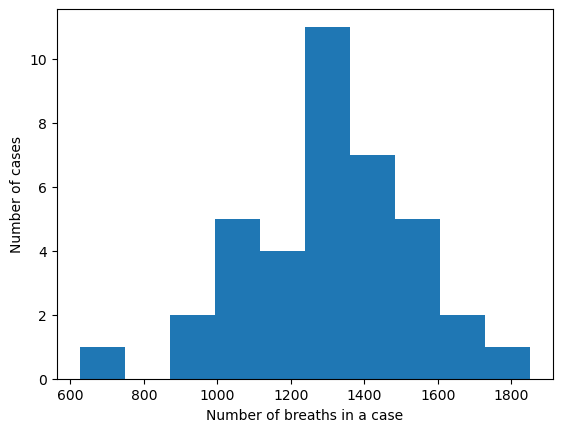

In [6]:
plt.hist([pd.read_csv(csv_file).shape[0] for csv_file in CSV_FILES])
plt.xlabel("Number of breaths in a case")
plt.ylabel("Number of cases")
# plt.savefig("num_breaths_hist.png", transparent=True)
None

## Distribution of Labels

Counter({'Normal': 27251, 'Assessment': 15140, 'Bronch': 3414, 'Recruitment': 1246, 'Noise': 1123, 'Unvisited': 767, 'InPause': 455, 'Deflation': 256, 'Question': 25})


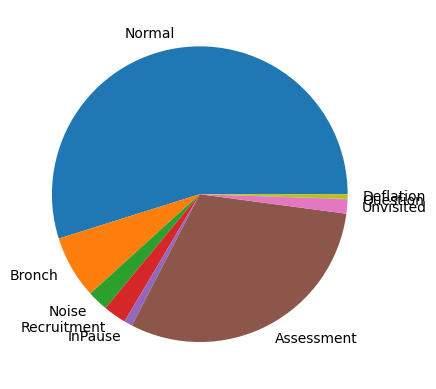

In [7]:
label_counter = Counter()
for csv_file in CSV_FILES:
    label_counter.update(pd.read_csv(csv_file)["Label"].values)
print(label_counter)
plt.pie(label_counter.values(), labels=label_counter.keys())
# plt.savefig("label_pie.png", transparent=True)
None

## Dynamic Compliance

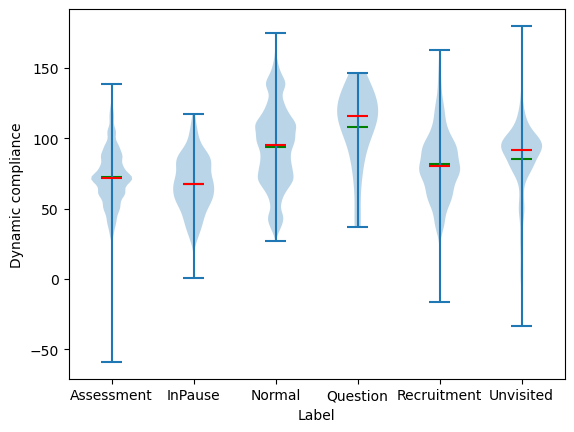

In [8]:
labels_of_interest = sorted(
    set(all_labels).difference({"Bronch", "Deflation", "Noise"})
)  # ["Normal", "Assessment"]
dy_comp_data = {label: [] for label in labels_of_interest}

for csv_file in CSV_FILES:
    df = pd.read_csv(csv_file)
    for label in labels_of_interest:
        dy_comp_data[label].append(df["Dy_comp"][df["Label"] == label])

violin = plt.violinplot(
    [np.concatenate(data) for data in dy_comp_data.values()],
    showmeans=True,
    showmedians=True,
)
violin["cmeans"].set_edgecolor("green")
violin["cmedians"].set_edgecolor("red")
plt.xticks(
    np.arange(1, len(labels_of_interest) + 1),
    labels=labels_of_interest,
)
plt.xlabel("Label")
plt.ylabel("Dynamic compliance")
# plt.savefig("dy_comp_violin.png", transparent=True)
None

/var/folders/6k/8jphdjqd56vgnxwrpmjyd0sw0000gn/T/ipykernel_55865/1200471606.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


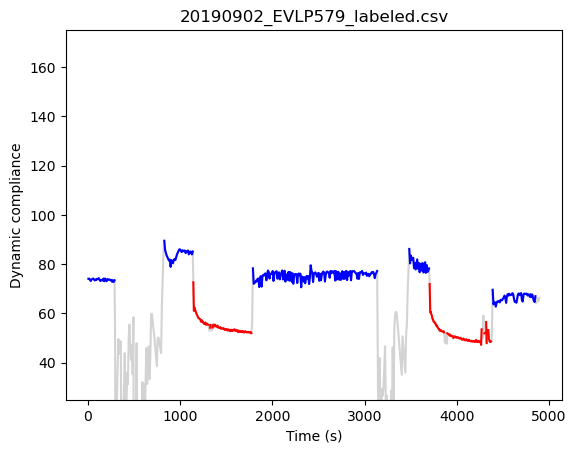

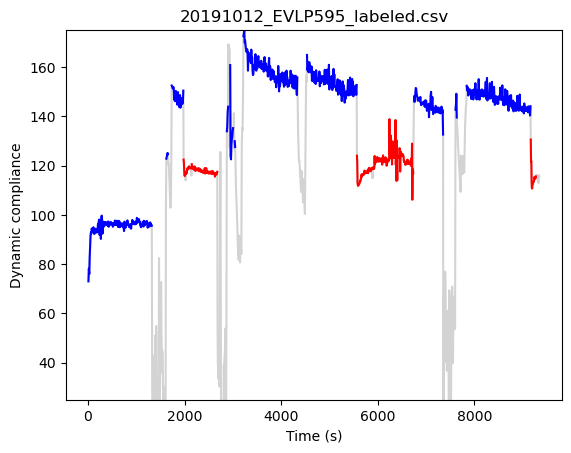

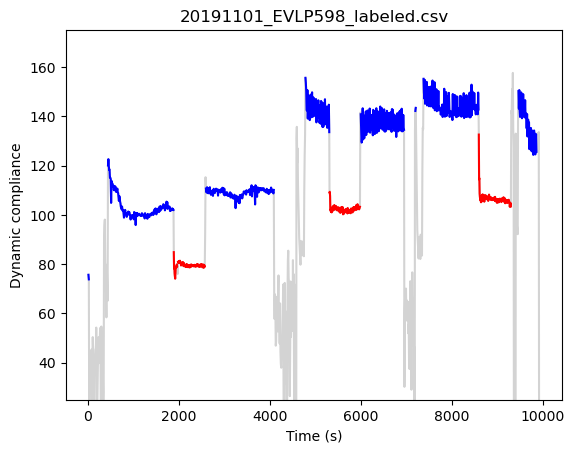

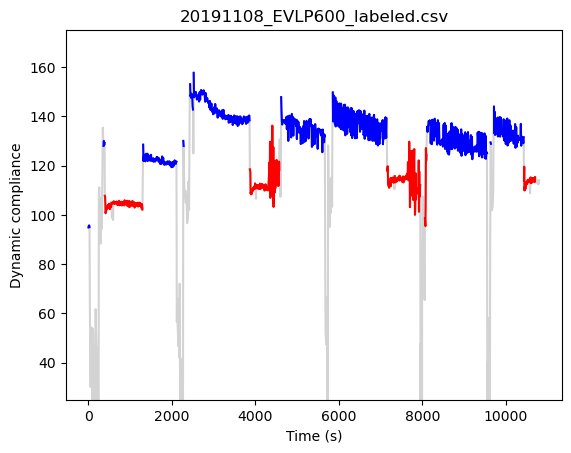

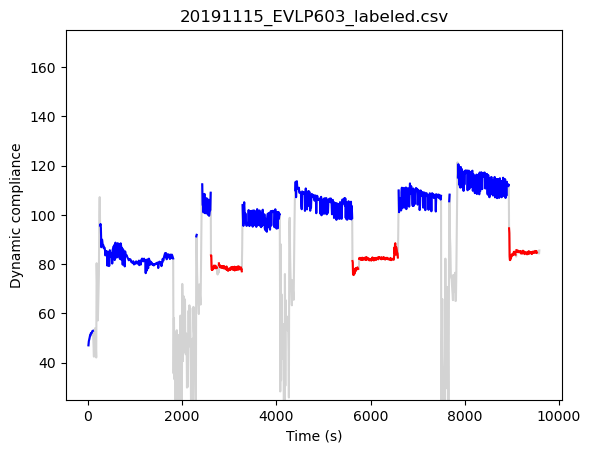

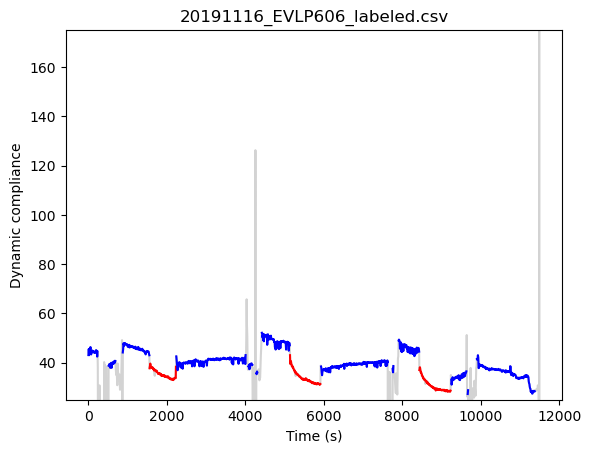

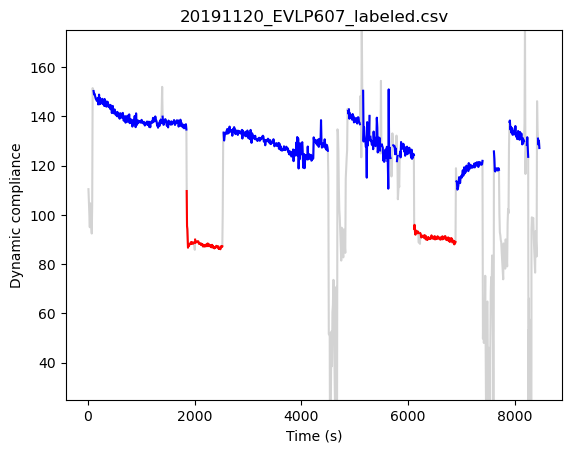

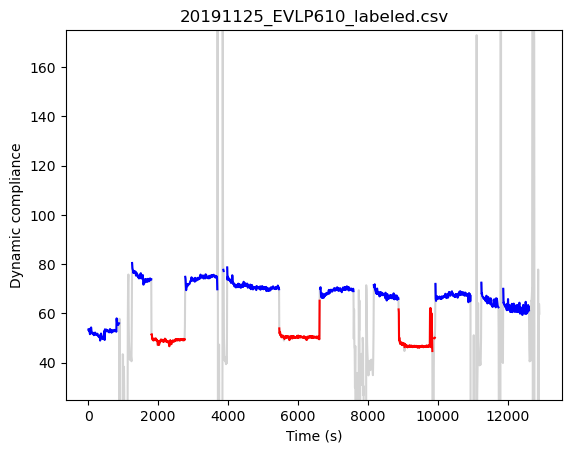

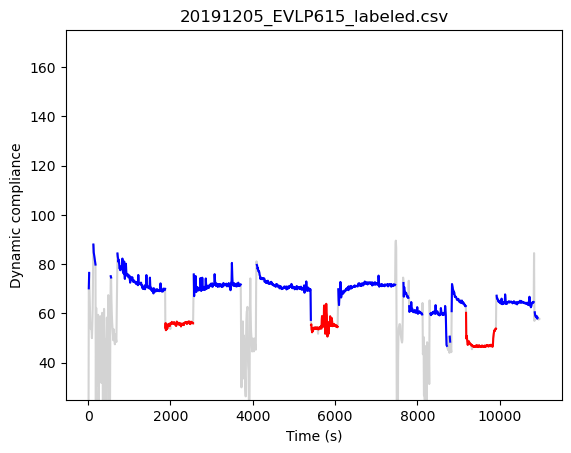

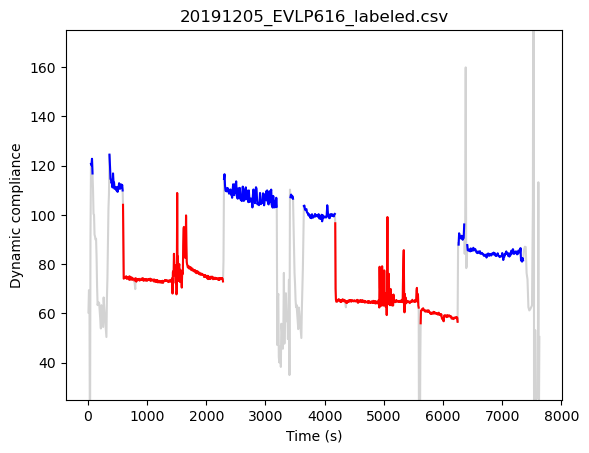

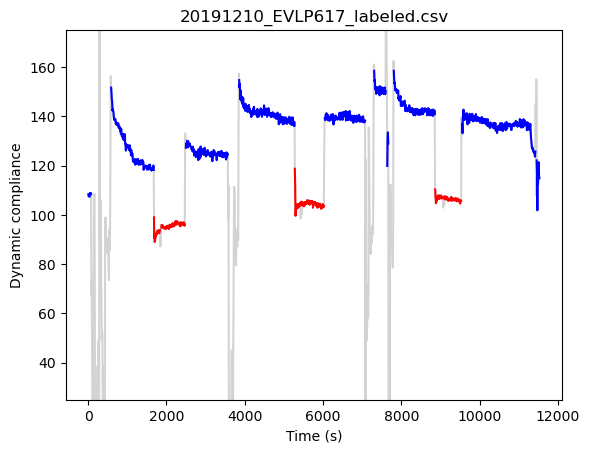

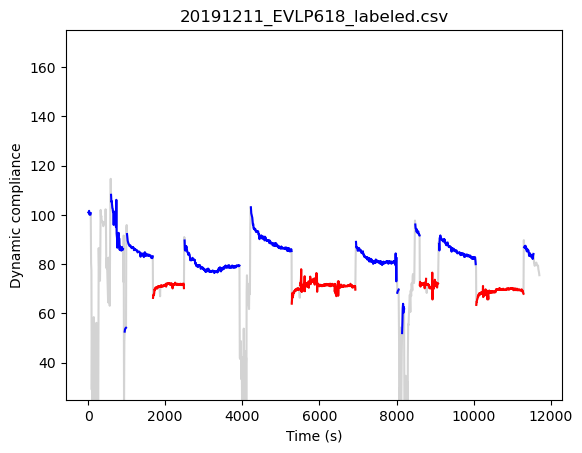

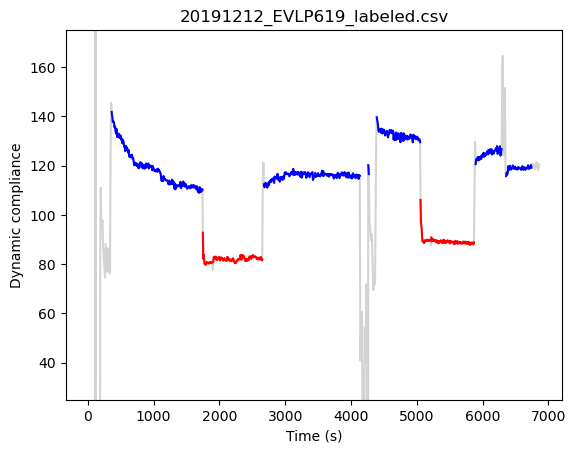

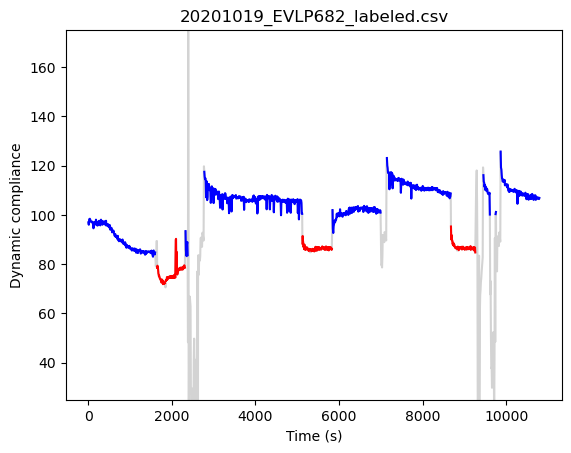

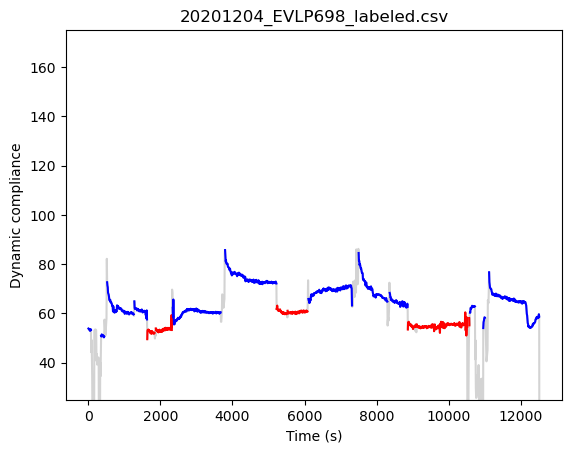

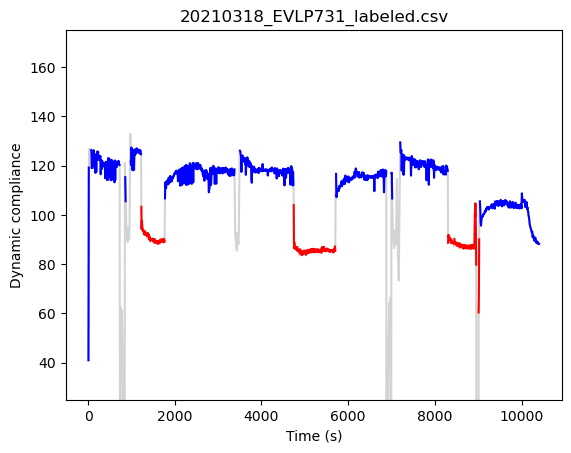

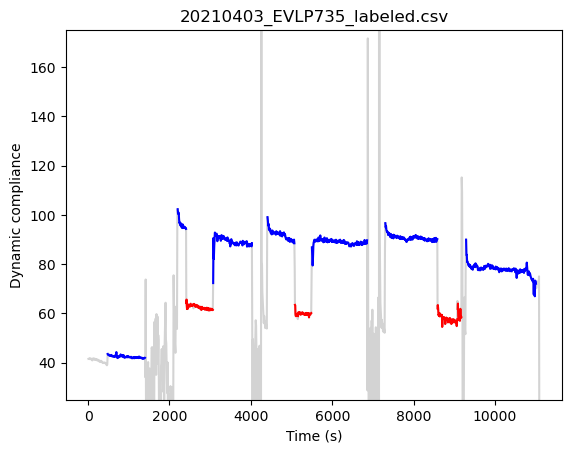

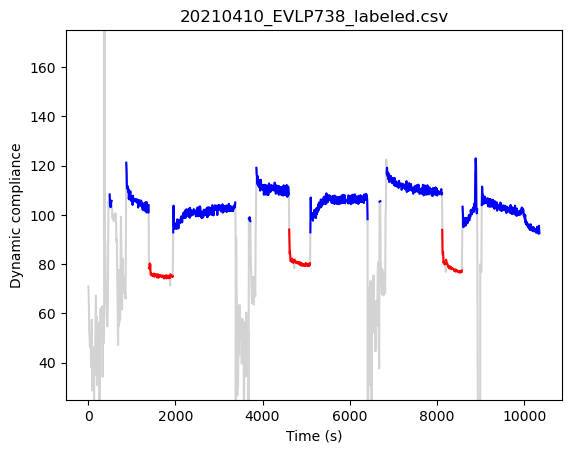

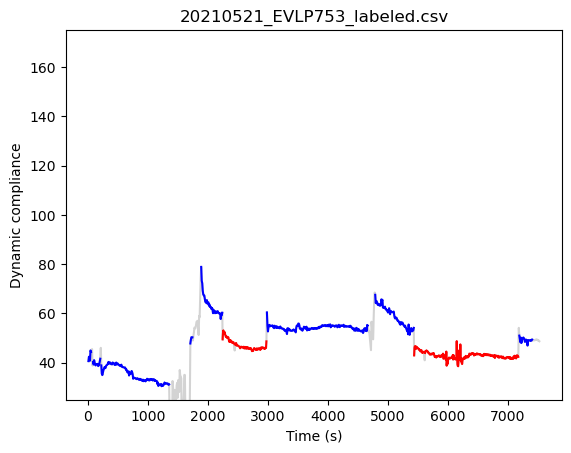

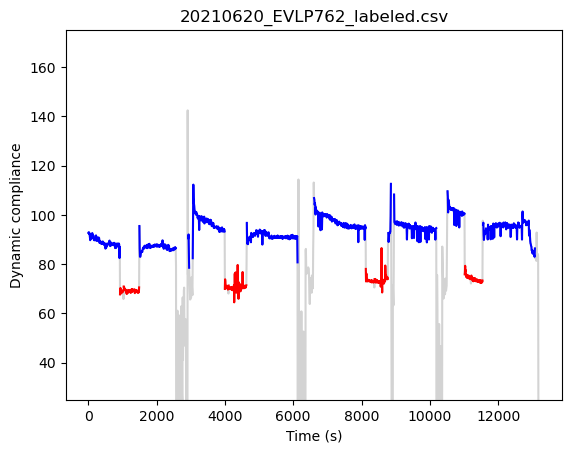

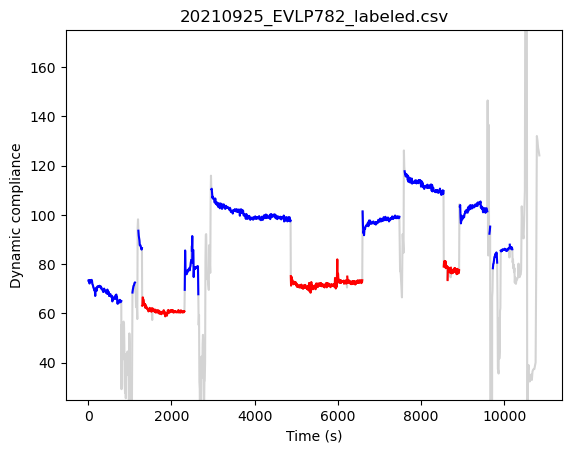

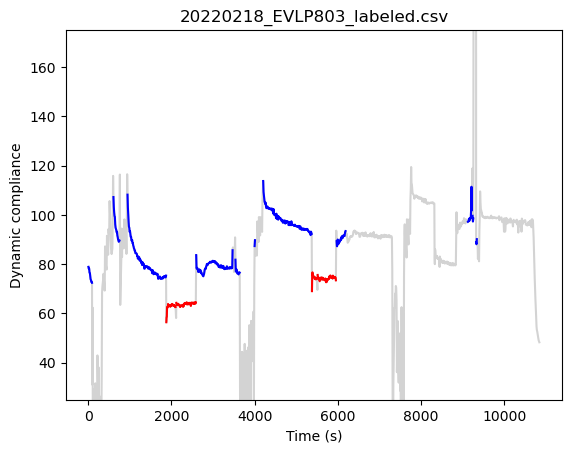

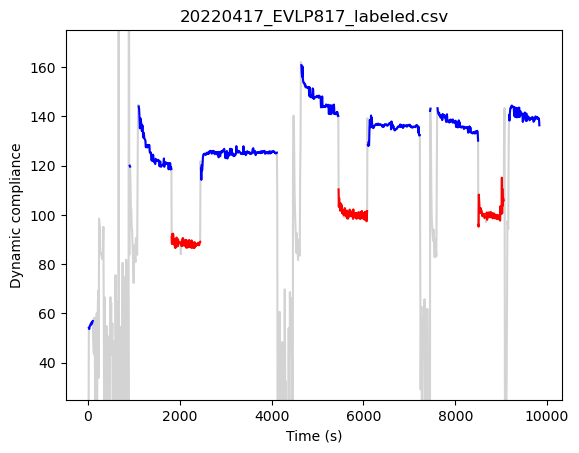

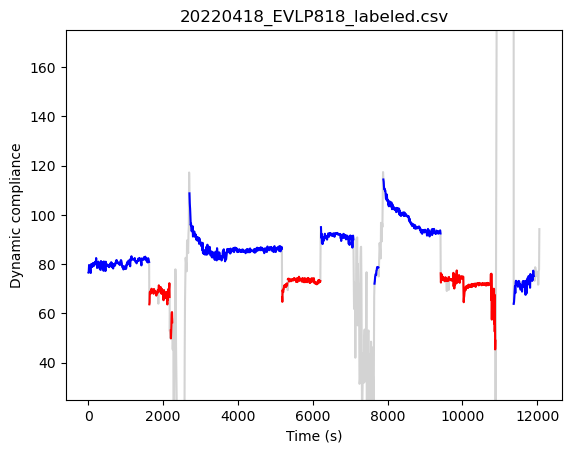

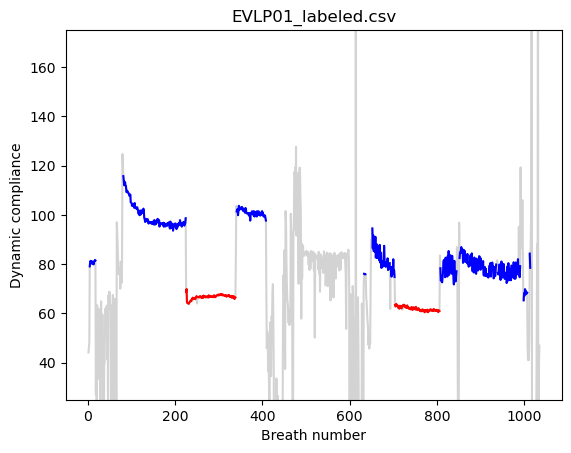

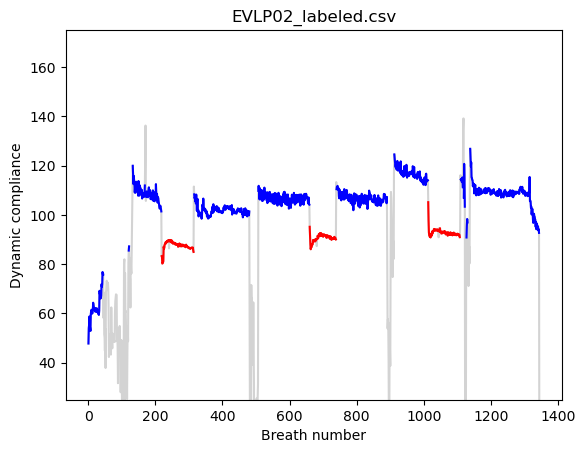

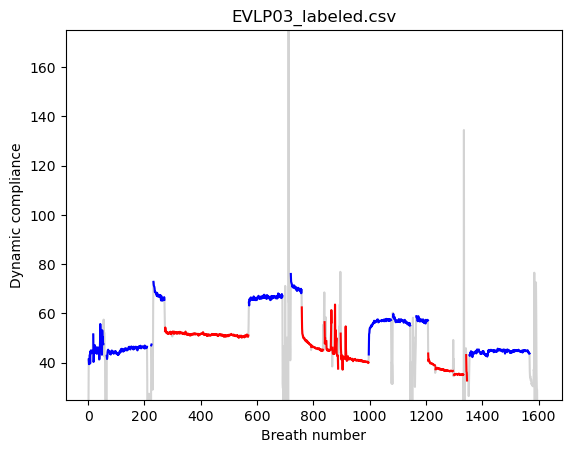

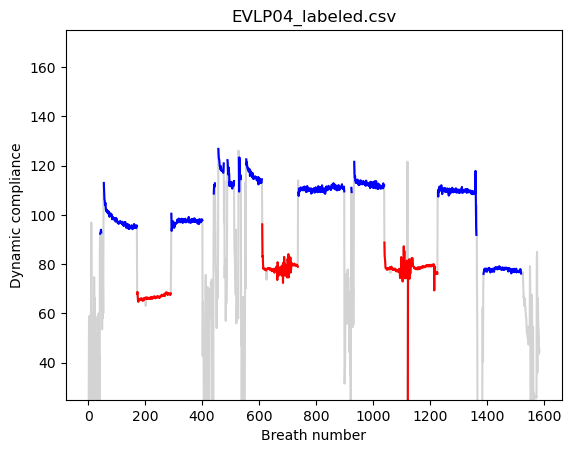

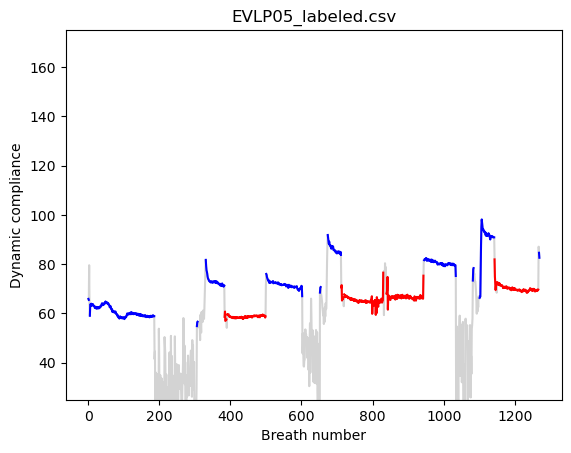

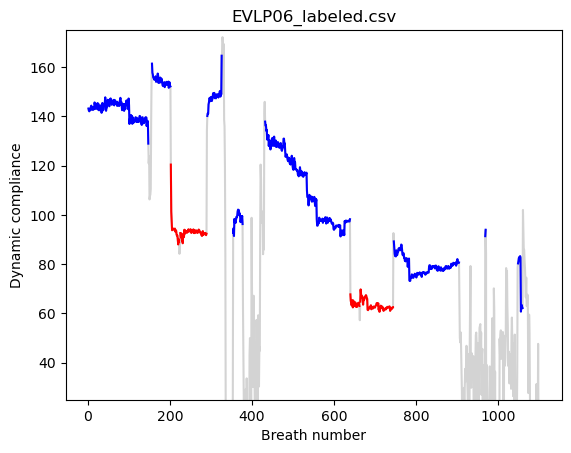

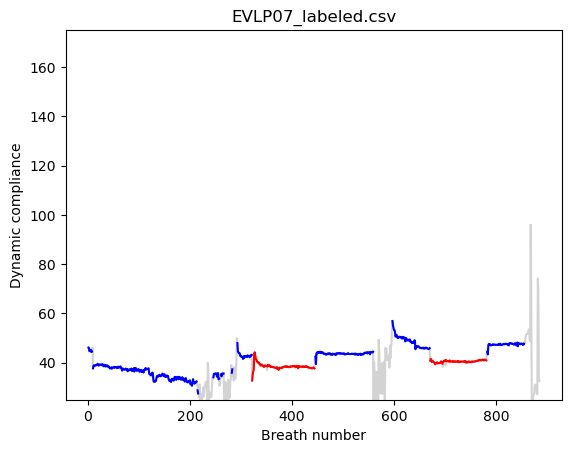

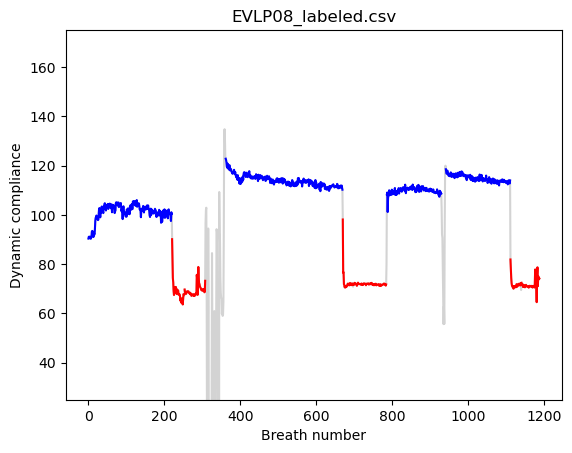

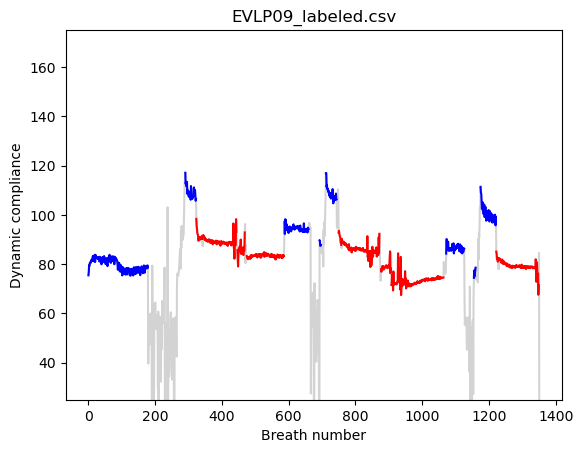

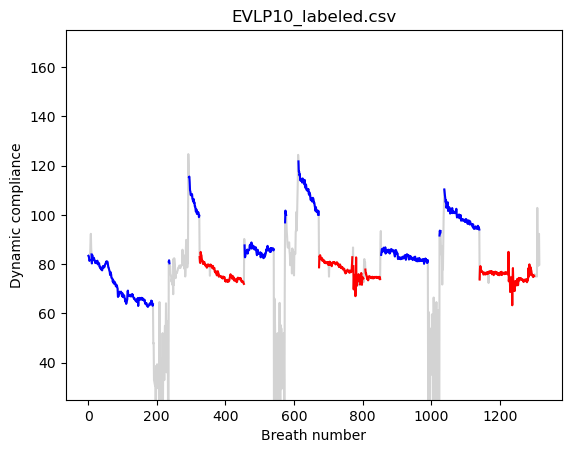

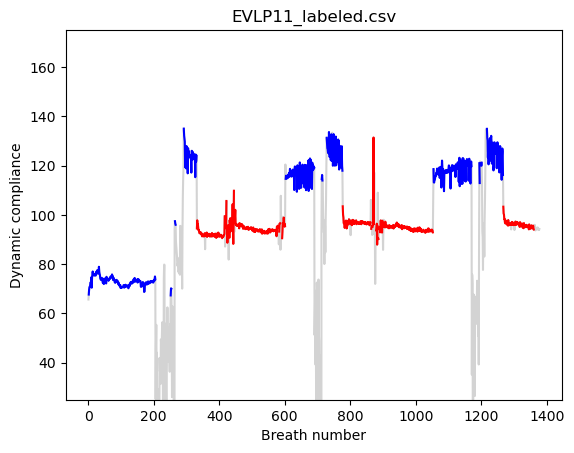

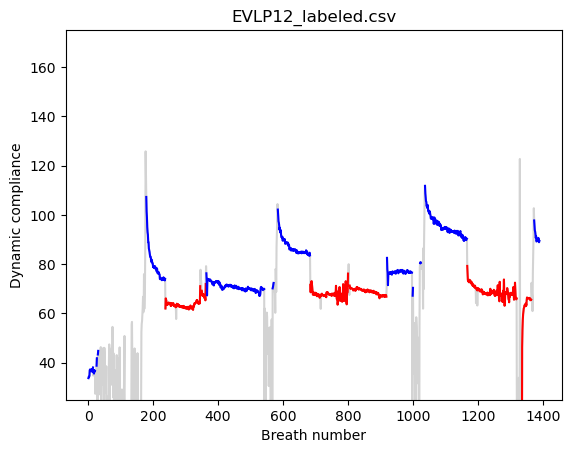

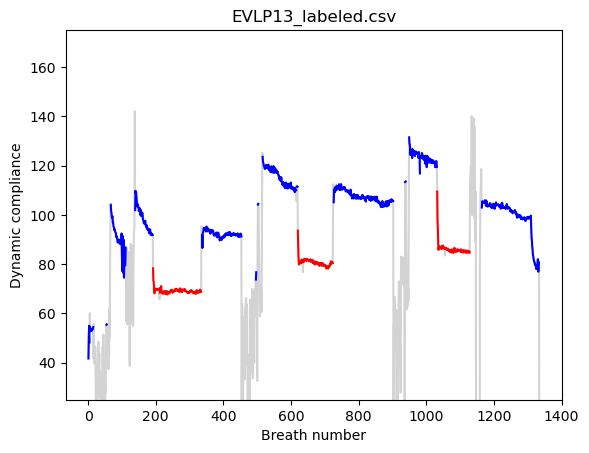

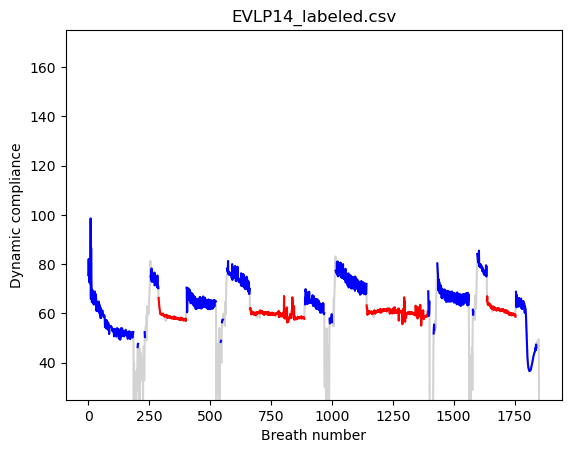

In [9]:
for csv_file in CSV_FILES:
    df = pd.read_csv(csv_file)
    plt.figure()
    plt.title(csv_file.name)
    plt.ylim(25, 175)
    t_start = None
    t_end = None
    if "Duration(s)" in df.columns:
        x_data = np.cumsum(df["Duration(s)"].to_numpy())
        x_label = "Time (s)"
    else:
        x_data = df["Breath_num"]
        x_label = "Breath number"
    plt.xlabel(x_label)
    plt.ylabel("Dynamic compliance")
    Dy_comp = df["Dy_comp"].to_numpy()
    plt.plot(x_data[t_start:t_end], Dy_comp[t_start:t_end], c="lightgray")
    for label, color in {
        "Assessment": "red",
        "Normal": "blue",
    }.items():
        Dy_comp_sub = Dy_comp.copy()
        Dy_comp_sub[df["Label"] != label] = float("nan")
        plt.plot(
            x_data[t_start:t_end],
            Dy_comp_sub[t_start:t_end],
            c=color,
        )
    # if "EVLP04_" in csv_file.name:
    #     plt.savefig("dy_comp_04.png", transparent=True)
None